<a href="https://colab.research.google.com/github/AbouCamara/IA-FORCE-N/blob/main/Pr%C3%A9diction_du_prix_d%E2%80%99ordinateurs_portables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

# Charger le fichier CSV pour exploration
file_path = '/content/laptop_data.csv'
data = pd.read_csv(file_path)

# Afficher un aperçu des données
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [49]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [21]:
# Supprimer la colonne inutile
data_cleaned = data.drop(columns=["Unnamed: 0"])

# Nettoyage et transformation des colonnes
# 1. Extraire uniquement les valeurs numériques pour `Ram` et `Weight`
data_cleaned["Ram"] = data_cleaned["Ram"].str.replace("GB", "").astype(int)
data_cleaned["Weight"] = data_cleaned["Weight"].str.replace("kg", "").astype(float)

# 2. Extraire les composants de `ScreenResolution`
resolution_split = data_cleaned["ScreenResolution"].str.split(" ", n=2, expand=True)
data_cleaned["Panel_Type"] = resolution_split[0].fillna("Unknown")
data_cleaned["Resolution"] = resolution_split[1].where(resolution_split[2].isnull(), resolution_split[2])

# 3. Extraire les composants clés de `Cpu`
cpu_split = data_cleaned["Cpu"].str.split(" ", n=2, expand=True)
data_cleaned["Cpu_Brand"] = cpu_split[0]
data_cleaned["Cpu_Model"] = cpu_split[1]

# 4. Transformer `Memory` en catégories distinctes (e.g., SSD, HDD)
memory_split = data_cleaned["Memory"].str.split(" ", n=2, expand=True)
data_cleaned["Storage_Size"] = memory_split[0].str.extract("(\d+)").astype(float)
data_cleaned["Storage_Type"] = memory_split[1].fillna("Unknown")

# Afficher un aperçu des données nettoyées
data_cleaned.head(), data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Panel_Type        1303 non-null   object 
 12  Resolution        989 non-null    object 
 13  Cpu_Brand         1303 non-null   object 
 14  Cpu_Model         1303 non-null   object 
 15  Storage_Size      1303 non-null   float64
 16  Storage_Type      1303 non-null   object 


(  Company   TypeName  Inches                    ScreenResolution  \
 0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
 1   Apple  Ultrabook    13.3                            1440x900   
 2      HP   Notebook    15.6                   Full HD 1920x1080   
 3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
 4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
 
                           Cpu  Ram               Memory  \
 0        Intel Core i5 2.3GHz    8            128GB SSD   
 1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
 2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
 3        Intel Core i7 2.7GHz   16            512GB SSD   
 4        Intel Core i5 3.1GHz    8            256GB SSD   
 
                             Gpu  OpSys  Weight        Price Panel_Type  \
 0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832        IPS   
 1        Intel HD Graphics 6000  macOS    1.34   47895.5232   1440x900 

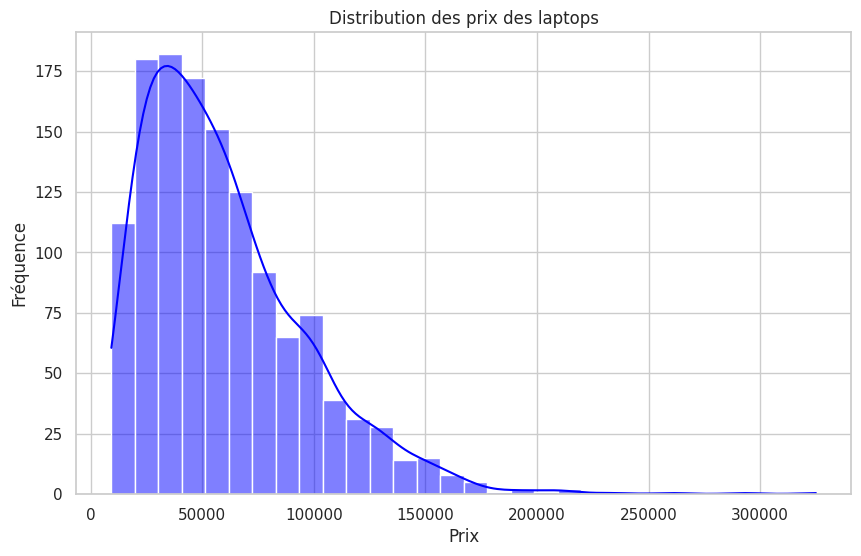

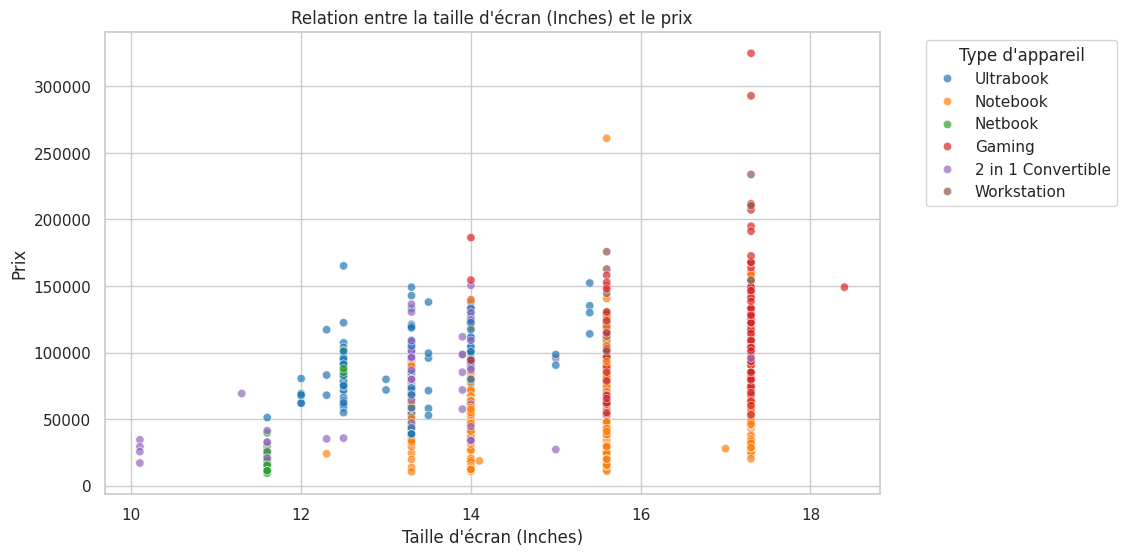

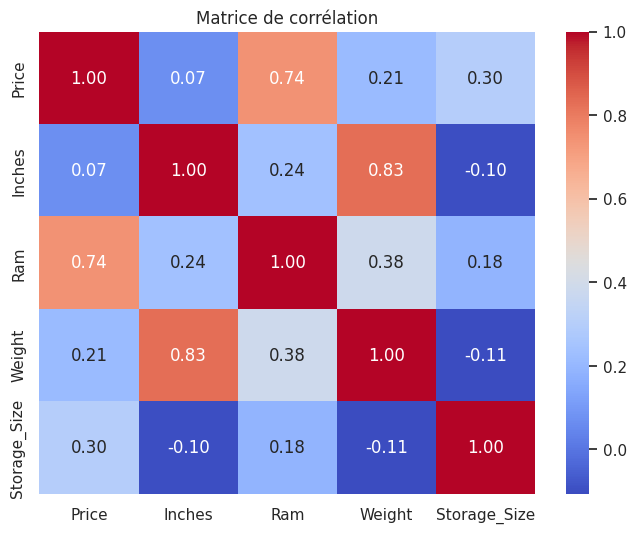

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer les graphiques
sns.set(style="whitegrid")

# 1. Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution des prix des laptops")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

# 2. Relation entre taille d'écran (Inches) et prix
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Inches", y="Price", data=data_cleaned, hue="TypeName", palette="tab10", alpha=0.7)
plt.title("Relation entre la taille d'écran (Inches) et le prix")
plt.xlabel("Taille d'écran (Inches)")
plt.ylabel("Prix")
plt.legend(title="Type d'appareil", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Corrélations entre variables numériques
correlation_matrix = data_cleaned[["Price", "Inches", "Ram", "Weight", "Storage_Size"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


<ipython-input-23-4d48c0ebaa43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TypeName", y="Price", data=data_cleaned, palette="Set3")


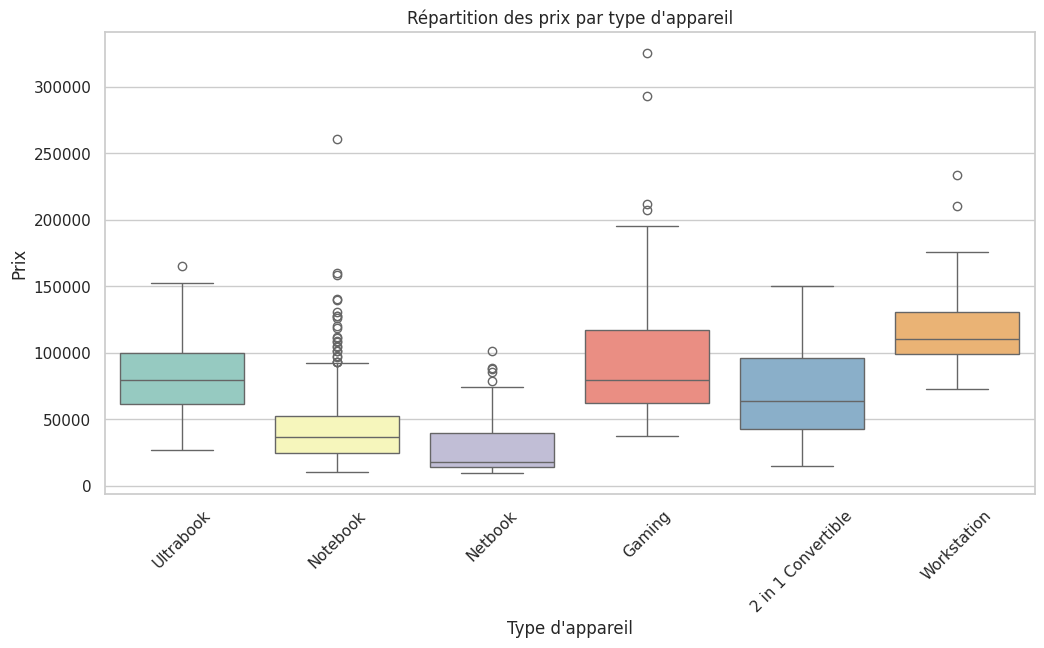

<ipython-input-23-4d48c0ebaa43>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Company", y="Price", data=data_cleaned, palette="Set2")


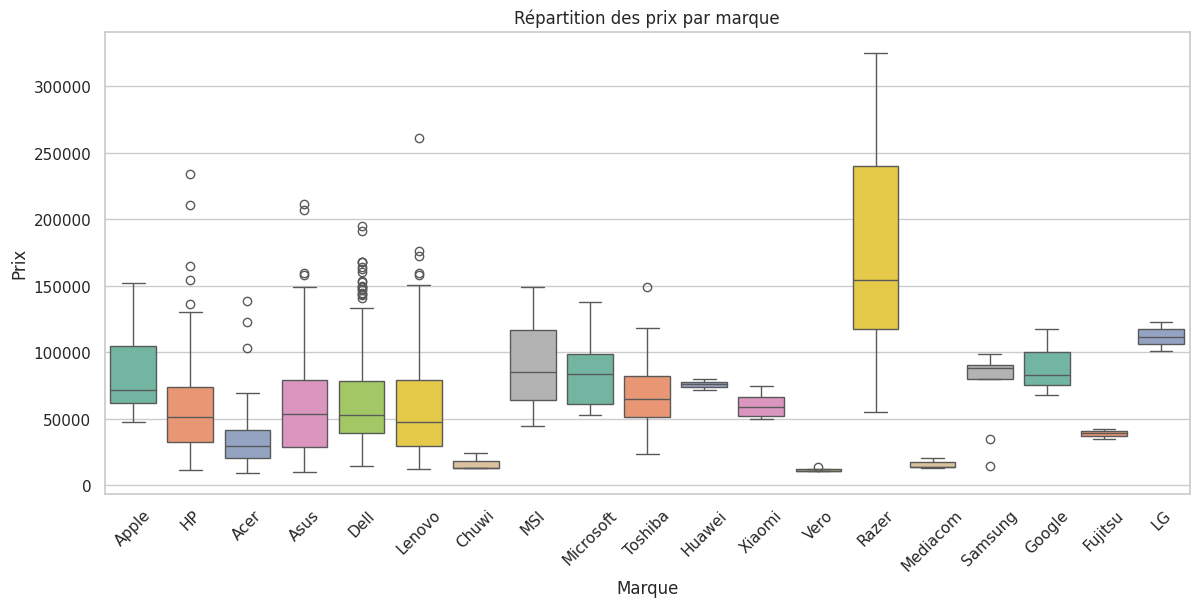

<ipython-input-23-4d48c0ebaa43>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Ram", y="Price", data=data_cleaned, palette="viridis", ci=None)
<ipython-input-23-4d48c0ebaa43>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ram", y="Price", data=data_cleaned, palette="viridis", ci=None)


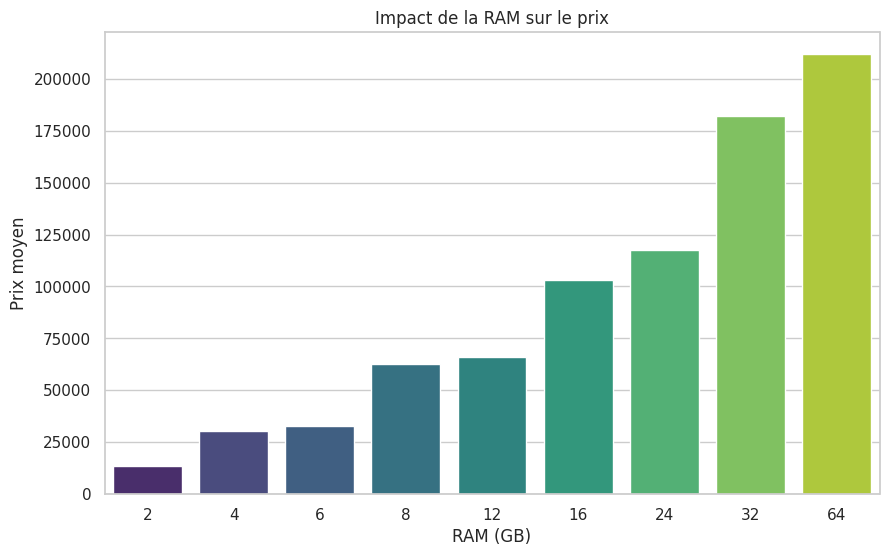

In [23]:
# 4. Répartition des prix par type d'appareil (TypeName)
plt.figure(figsize=(12, 6))
sns.boxplot(x="TypeName", y="Price", data=data_cleaned, palette="Set3")
plt.title("Répartition des prix par type d'appareil")
plt.xlabel("Type d'appareil")
plt.ylabel("Prix")
plt.xticks(rotation=45)
plt.show()

# 5. Répartition des prix par marque (Company)
plt.figure(figsize=(14, 6))
sns.boxplot(x="Company", y="Price", data=data_cleaned, palette="Set2")
plt.title("Répartition des prix par marque")
plt.xlabel("Marque")
plt.ylabel("Prix")
plt.xticks(rotation=45)
plt.show()

# 6. Impact de la RAM sur le prix
plt.figure(figsize=(10, 6))
sns.barplot(x="Ram", y="Price", data=data_cleaned, palette="viridis", ci=None)
plt.title("Impact de la RAM sur le prix")
plt.xlabel("RAM (GB)")
plt.ylabel("Prix moyen")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Définir les variables indépendantes (features) et la variable cible (target)
target = "Price"
features = ["Company", "TypeName", "Inches", "Ram", "Weight", "Panel_Type", "Cpu_Brand", "Storage_Size", "Storage_Type"]

X = data_cleaned[features]
y = data_cleaned[target]

# Encodage des variables catégoriques et imputation si nécessaire
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

# Prétraitement pour les colonnes catégoriques et numériques
categorical_preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numerical_preprocessor = SimpleImputer(strategy="mean")

# Combiner dans un transformateur
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_preprocessor, numerical_features),
        ("cat", categorical_preprocessor, categorical_features)
    ]
)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Résumé de la division des données
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1042, 9), (261, 9), (1042,), (261,))

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Identifier les colonnes catégoriques
categorical_columns = X_train.select_dtypes(include=["object"]).columns

# Appliquer OneHotEncoder aux colonnes catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ],
    remainder="passthrough"  # Laisser les colonnes numériques intactes
)

# Transformer les données
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Entraîner le modèle
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

# Faire des prédictions
y_pred = lin_reg.predict(X_test_transformed)


In [28]:
print(data.columns)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [29]:
if 'target' in data.columns:
    X = data.drop("target", axis=1)
    y = data["target"]
else:
    print("La colonne 'target' n'existe pas dans le DataFrame.")


La colonne 'target' n'existe pas dans le DataFrame.


In [32]:
# Vérifier les types de colonnes
print(X_train.dtypes)

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
dtype: object


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifier les colonnes catégoriques (qui sont des objets ou des chaînes de caractères)
categorical_columns = X_train.select_dtypes(include=["object"]).columns

# Créer un transformateur pour encoder les colonnes catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_columns)
    ],
    remainder="passthrough"  # Garder les autres colonnes inchangées (numériques)
)

# Créer un pipeline pour intégrer la transformation et l'entraînement du modèle
models = {
    "Régression Linéaire": LinearRegression(),
    "Forêt Aléatoire": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

# Boucle pour entraîner chaque modèle
for model_name, model in models.items():
    # Créer un pipeline complet avec préprocessing et modèle
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Entraînement
    pipeline.fit(X_train, y_train)

    # Prédictions
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Stocker les résultats
    results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                              MAE          RMSE        R²
Régression Linéaire  11009.054485  16885.724279  0.802253
Forêt Aléatoire      10290.708135  19572.251537  0.734324
Gradient Boosting    11908.575621  17721.590944  0.782191


In [34]:
# Vérifier le premier échantillon des données transformées
X_train_transformed = preprocessor.fit_transform(X_train)
print(X_train_transformed[:5])

[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+01 1.560e+01]
 [0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 1.470e+02 1.560e+01]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.287e+03 1.560e+01]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 7.670e+02 1.560e+01]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 8.160e+02 1.250e+01]]


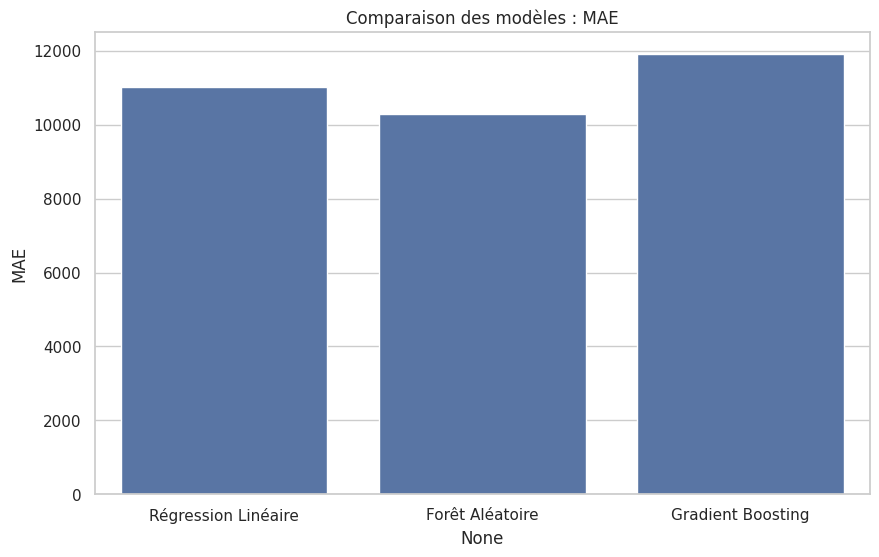

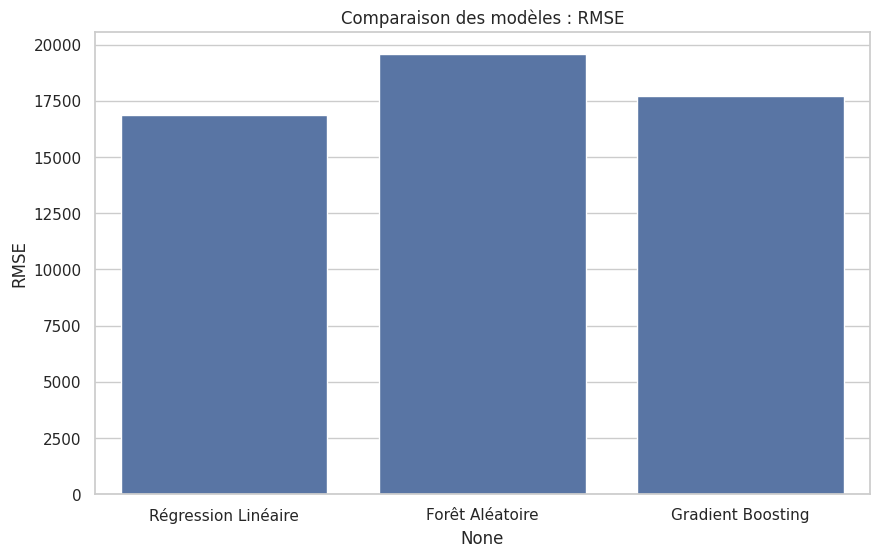

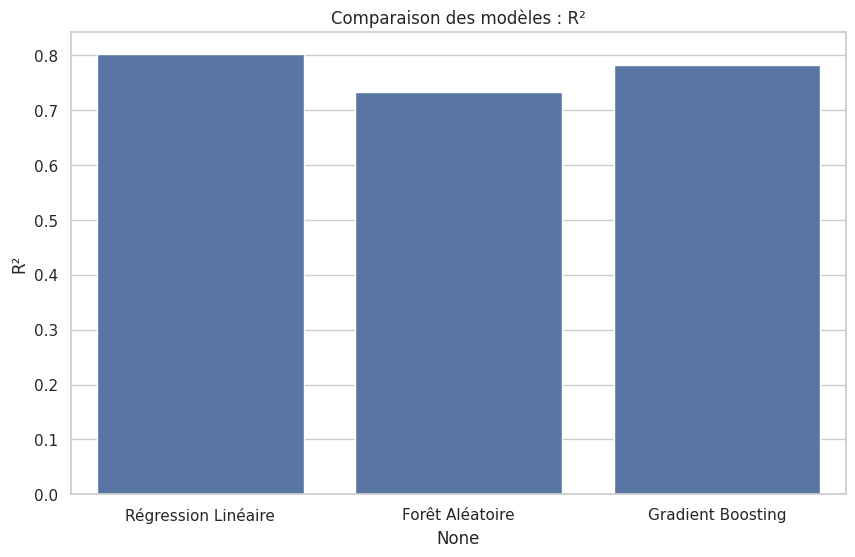

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion des résultats en DataFrame
results_data = pd.DataFrame(results).T

# Configuration de la taille des graphiques
plt.figure(figsize=(10, 6))

# Bar plot pour comparer MAE
sns.barplot(x=results_data.index, y=results_data['MAE'])
plt.title("Comparaison des modèles : MAE")
plt.ylabel("MAE")
plt.show()

# Bar plot pour comparer RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title("Comparaison des modèles : RMSE")
plt.ylabel("RMSE")
plt.show()

# Bar plot pour comparer R²
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R²'])
plt.title("Comparaison des modèles : R²")
plt.ylabel("R²")
plt.show()


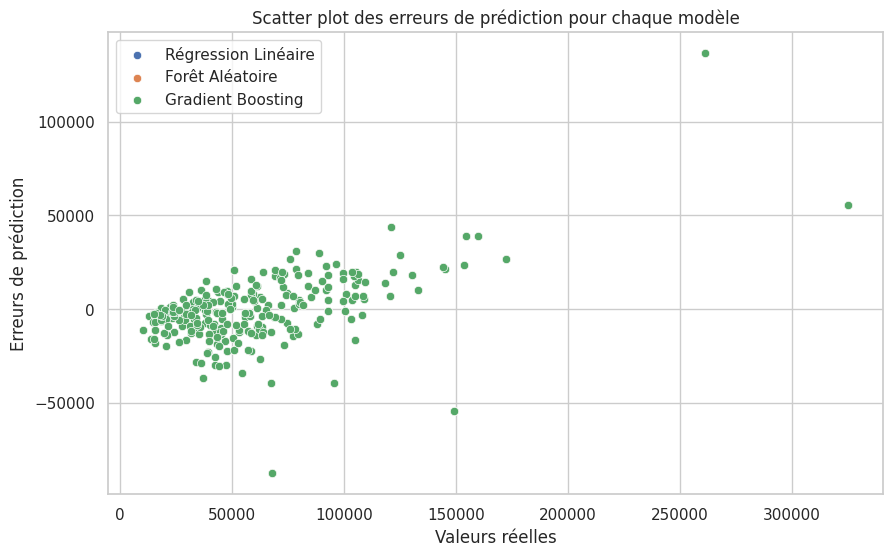

In [42]:
# prompt: Scatter plot des erreurs de prédiction pour chaque modèle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# En supposant que «y_test» et «y_pred» sont disponibles pour chaque modèle

# Créez un dictionnaire pour stocker les erreurs de prédiction pour chaque modèle
errors = {}

# Calculer les erreurs de prédiction pour chaque modèle
for model_name, model in models.items():
   # Prédire l'utilisation du modèle formé (assurez-vous que le modèle est correctement nommé et ajusté)
    y_pred = pipeline.predict(X_test) # Assurez-vous que le pipeline est utilisé ici
    errors[model_name] = y_test - y_pred

# Créer le plot
plt.figure(figsize=(10, 6))

for model_name, error in errors.items():
    sns.scatterplot(x=y_test, y=error, label=model_name)

plt.xlabel("Valeurs réelles")
plt.ylabel("Erreurs de prédiction")
plt.title("Scatter plot des erreurs de prédiction pour chaque modèle")
plt.legend()
plt.show()

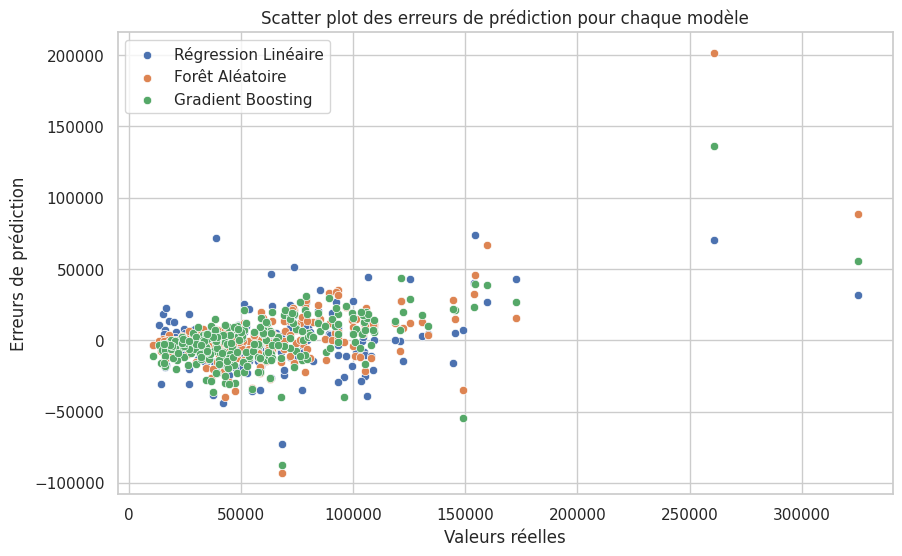

## Rapport de performance des modèles
                              MAE          RMSE        R²
Régression Linéaire  11009.054485  16885.724279  0.802253
Forêt Aléatoire      10290.708135  19572.251537  0.734324
Gradient Boosting    11908.575621  17721.590944  0.782191


In [43]:
# prompt: Rapport synthétique des performances

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Créez un dictionnaire pour stocker les erreurs de prédiction pour chaque modèle
errors = {}

# Calculer les erreurs de prédiction pour chaque modèle
for model_name, model in models.items():
   # Prédire l'utilisation du modèle formé
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    errors[model_name] = y_test - y_pred


# Créer le plot
plt.figure(figsize=(10, 6))

for model_name, error in errors.items():
    sns.scatterplot(x=y_test, y=error, label=model_name)

plt.xlabel("Valeurs réelles")
plt.ylabel("Erreurs de prédiction")
plt.title("Scatter plot des erreurs de prédiction pour chaque modèle")
plt.legend()
plt.show()

# Fonction pour afficher le rapport
def display_performance_report(results_df):
    print("## Rapport de performance des modèles")
    print(results_df)

# Appelez la fonction
display_performance_report(results_df)

In [44]:
# prompt: Conclusion sur les résultats

# Analyse des résultats et conclusion

# Analyse du tableau des résultats (results_df) :
# Comparer les MAE, RMSE et R² pour chaque modèle.
# Le modèle avec le plus faible MAE et RMSE et le plus haut R² est généralement le meilleur.

# Analyse des graphiques :
# Observer la distribution des erreurs de prédiction (scatter plot).
# Une bonne dispersion des points autour de 0 indique une bonne performance du modèle.

# Conclusion :
# En fonction des résultats quantitatifs (métriques) et visuels (graphiques),
# conclure quel modèle est le plus performant pour la prédiction des prix des ordinateurs portables.
# Discuter des forces et faiblesses de chaque modèle.
# Identifier les points importants des analyses réalisées.

# Améliorations possibles :
# Explorer d'autres modèles ou techniques de régression.
# Ajuster les hyperparamètres des modèles existants pour améliorer les performances.
# Considérer d'autres caractéristiques ou variables pour améliorer la précision du modèle.
# Réaliser une analyse des erreurs plus approfondie pour identifier les cas où les modèles sont moins performants.

# Attention : L'analyse des performances doit tenir compte du contexte de la tâche et des exigences métier.

In [45]:
# prompt: Choisir le modèle avec le RMSE le plus bas

# En supposant que «Results_data» est déjà créé comme dans votre code d'origine

# Trouvez le modèle avec le RMSE le plus bas
best_model = results_df['RMSE'].idxmin()

print(f"Le modèle avec le RMSE le plus bas est : {best_model}")

Le modèle avec le RMSE le plus bas est : Régression Linéaire


In [46]:
# prompt: Rapport de présentation du travail effectué avec une démonstration

# Fonction pour afficher le rapport
def display_performance_report(results_df):
    print("## Rapport de performance des modèles")
    print(results_df)

# Appelez la fonction (en supposant que les résultats_data sont définis dans votre code)
display_performance_report(results_df)

# Trouvez le modèle avec le RMSE le plus bas
best_model = results_df['RMSE'].idxmin()

print(f"Le modèle avec le RMSE le plus bas est : {best_model}")

## Rapport de performance des modèles
                              MAE          RMSE        R²
Régression Linéaire  11009.054485  16885.724279  0.802253
Forêt Aléatoire      10290.708135  19572.251537  0.734324
Gradient Boosting    11908.575621  17721.590944  0.782191
Le modèle avec le RMSE le plus bas est : Régression Linéaire
